<a href="https://colab.research.google.com/github/Void3604/ML-lab-Programs/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Number of samples in each class:
Price_Bin
Low       10089
Medium     7623
High       2928
Name: count, dtype: int64

Checking for null values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
Price_Bin      0
dtype: int64


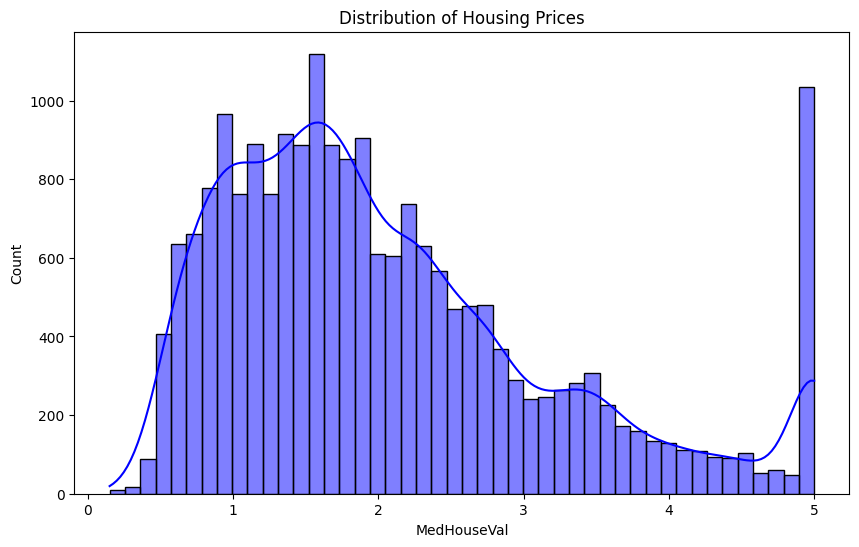

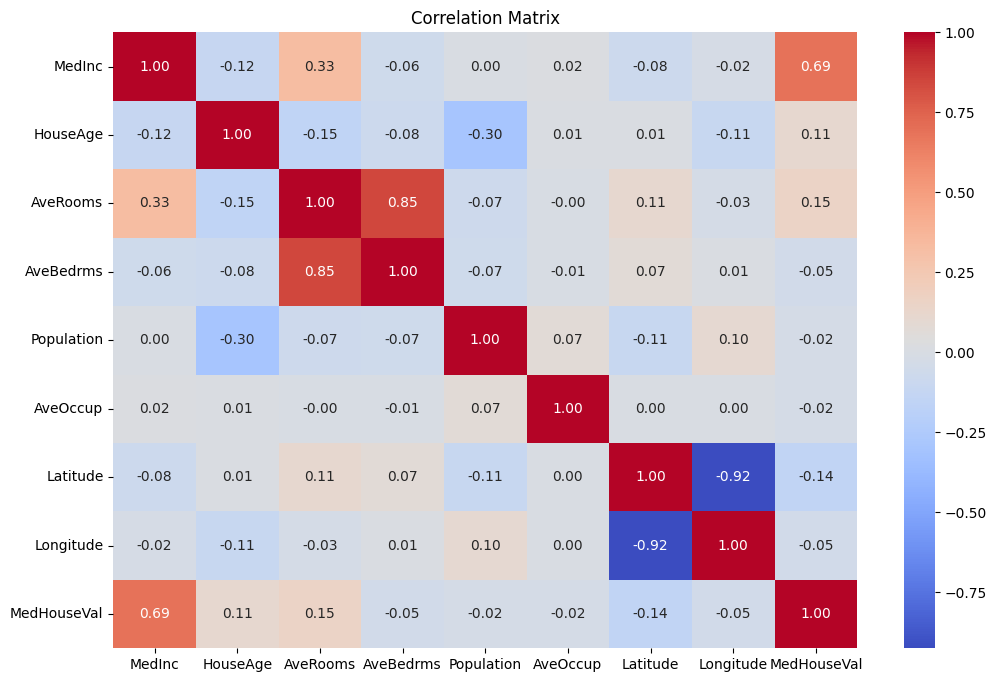


Covariance Matrix:
                MedInc     HouseAge    AveRooms  AveBedrms    Population  \
MedInc        3.609323    -2.846140    1.536568  -0.055858  1.040098e+01   
HouseAge     -2.846140   158.396260   -4.772882  -0.463718 -4.222271e+03   
AveRooms      1.536568    -4.772882    6.121533   0.993868 -2.023337e+02   
AveBedrms    -0.055858    -0.463718    0.993868   0.224592 -3.552723e+01   
Population   10.400979 -4222.270582 -202.333712 -35.527225  1.282470e+06   
AveOccup      0.370289     1.724298   -0.124689  -0.030424  8.217120e+02   
Latitude     -0.323860     0.300346    0.562235   0.070575 -2.631378e+02   
Longitude    -0.057765    -2.728244   -0.136518   0.012670  2.263778e+02   
MedHouseVal   1.508475     1.533988    0.433826  -0.025539 -3.221249e+01   

               AveOccup    Latitude   Longitude  MedHouseVal  
MedInc         0.370289   -0.323860   -0.057765     1.508475  
HouseAge       1.724298    0.300346   -2.728244     1.533988  
AveRooms      -0.124689    0.5

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Import dataset
california = fetch_california_housing(as_frame=True)
california_df = california.frame

# Step 2: Display first 5 rows
print("First 5 rows of the dataset:")
print(california_df.head())

# Step 3: Check the number of samples of each class (Here 'MedHouseVal' is continuous, so we bin it)
california_df['Price_Bin'] = pd.cut(california_df['MedHouseVal'], bins=3, labels=['Low', 'Medium', 'High'])
print("\nNumber of samples in each class:")
print(california_df['Price_Bin'].value_counts())

# Step 4: Check for null values
print("\nChecking for null values:")
print(california_df.isnull().sum())

def visualize_data(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['MedHouseVal'], kde=True, color='blue')
    plt.title('Distribution of Housing Prices')
    plt.show()

    # Select only numeric columns for correlation matrix
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

visualize_data(california_df)

# Step 6: Obtain covariance and correlation values
print("\nCovariance Matrix:")
numeric_df = california_df.select_dtypes(include=[np.number])
print(numeric_df.cov())

print("\nCorrelation Matrix:")
print(numeric_df.corr())

# Step 7: Implement Gradient Descent for linear regression
# Prepare data
X = california_df.drop(['MedHouseVal', 'Price_Bin'], axis=1).values
y = california_df['MedHouseVal'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term to X
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Gradient Descent
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= lr * gradients
    return theta

# Train model
theta = gradient_descent(X_train, y_train, lr=0.1, epochs=5000)

# Make predictions
y_pred = X_test.dot(theta)

# Step 7: Predict the accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
